---
Machine/Deep Learning

---

# Deep neural network
## Image Classification
We have *monochrome images* of handwritten digits, nearly 1700. These images also have corresponding attributes showing actual values they represent, that will help train the data set. Data set will be divided into two parts, one for training and remaining for carrying out test to assess accuracy of model. The dataset is taken from UCI machine learning repository. The accuracy is measured by proportion of predicted labels being same as actual labels.

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset = load_digits()
dataset.data.shape

(1797, 64)

### Explore dataset

In [2]:
type(dataset)

sklearn.datasets.base.Bunch

In [3]:
dataset.keys()

dict_keys(['images', 'data', 'DESCR', 'target', 'target_names'])

#### Target labels

In [4]:
source_labels = pd.Series(dataset['target'])

In [5]:
source_data = pd.DataFrame(dataset['data'])
source_data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


#### Display image using NumPy reshape

In [6]:
first_image = source_data.iloc[0]
numpy_image = first_image.values
numpy_image = numpy_image.reshape(8,8)

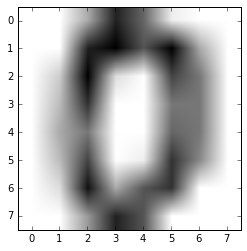

In [7]:
plt.imshow(numpy_image, cmap='gray_r')

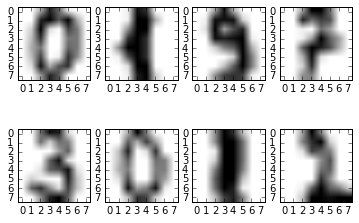

In [8]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(source_data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(source_data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(source_data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(source_data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(source_data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(source_data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(source_data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(source_data.iloc[1299].values.reshape(8,8), cmap='gray_r')

### *k*-nearest neighbor
We start training machine learning model, using one of the basic algorithms first, the *k*-nearest neighbor algorithm.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# 50% Train / test validation
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

# Test and return accuracy
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(source_data):
        train_features, test_features = source_data.loc[train_index], source_data.loc[test_index]
        train_labels, test_labels = source_labels.loc[train_index], source_labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        
knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)


0.9677233358079684

##### Impact on accuracy from variation in *k* values

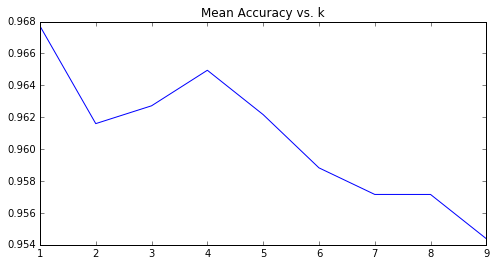

In [11]:

k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)


### Neural network with 1 hidden layer
After running and obtaining accuracies of k-nn model,we now start the Neural Network model for *Classification*, first with `1` hidden layer. 

In [12]:
# Define the three functions

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

def train_neural(layers, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=250)
    mlp.fit(train_features, train_labels)
    return mlp

def test_neural(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def neural_cross_validate(layers):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(source_data):
        train_features, test_features = source_data.loc[train_index], source_data.loc[test_index]
        train_labels, test_labels = source_labels.loc[train_index], source_labels.loc[test_index]
        model = train_neural(layers, train_features, train_labels)
        overall_accuracy = test_neural(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies



#### Variation in number of neurons
We have created and run six models, each with single layer. The accuracy is `0.89` for *8 neurons*, but increases dramatically for 32 neurons. And then stays more or less same. It does not seem to go above `0.95`. 

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



[0.8777777777777778, 0.9086859688195991, 0.8775055679287305, 0.8685968819599109]
[0.9444444444444444, 0.8997772828507795, 0.9576837416481069, 0.9020044543429844]
[0.9422222222222222, 0.9287305122494433, 0.955456570155902, 0.9064587973273942]
[0.9511111111111111, 0.9354120267260579, 0.9398663697104677, 0.9220489977728286]
[0.9533333333333334, 0.9354120267260579, 0.9510022271714922, 0.9287305122494433]
[0.9666666666666667, 0.9398663697104677, 0.9643652561247216, 0.910913140311804]
[0.8831415491215046, 0.9259774808215788, 0.9332170254887404, 0.9371096263301163, 0.9421195248700817, 0.945452858203415]


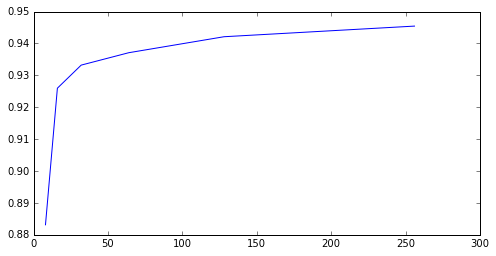

In [13]:
# Loop through the six neuron sizes & run model for each
neurons = [ 
    (8,), (16,), (32,), 
   (64,), (128,), (256,)
        ]
nn_one_accuracies = []

for n in neurons:
    nn_accuracies = neural_cross_validate(n)
    print(nn_accuracies)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

print(nn_one_accuracies)    
plt.figure(figsize=(8,4))
x = [i[0] for i in neurons]
plt.plot(x, nn_one_accuracies)  


### Neural Network with two hidden layers
We are modifying the neurons list so that it has two layers of same size.

> Two layers each with 64 neuron itself a good accuracy around `0.94`, it increased further with 128 and 256 neurons, to `0.96`. The trend appears to deliver even better results but program is beginning to slow down tremendously. Hence further neurons not added.

[0.9555555555555556, 0.9309576837416481, 0.9599109131403119, 0.9242761692650334]
[0.9511111111111111, 0.9487750556792873, 0.9710467706013363, 0.9443207126948775]
[0.9755555555555555, 0.9443207126948775, 0.9710467706013363, 0.9465478841870824]


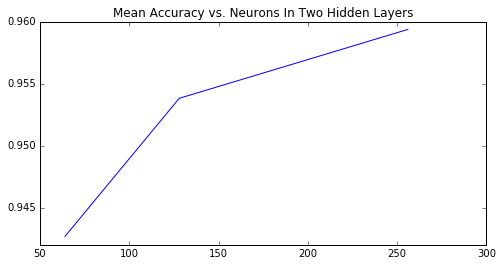

In [14]:
two_neurons = [ 
    (64,64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in two_neurons:
    nn_accuracies = neural_cross_validate(n)
    print(nn_accuracies)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in two_neurons]
plt.plot(x, nn_two_accuracies)


### Three neuron layers
The accuracy with additional 'third' layer at three sets of hidden layers of 10, 64 and 128 neurons each is shown in plot below. It seems promising to give even better accuracy with higher number of neurons. 

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

def train_neural(layers, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=250)
    mlp.fit(train_features, train_labels)
    return mlp

def test_neural(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def neural_cross_validate(layers):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2)
    for train_index, test_index in kf.split(source_data):
        train_features, test_features = source_data.loc[train_index], source_data.loc[test_index]
        train_labels, test_labels = source_labels.loc[train_index], source_labels.loc[test_index]
        model = train_neural(layers, train_features, train_labels)
        overall_accuracy = test_neural(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies



[0.8866666666666667, 0.9233333333333333, 0.9033333333333333, 0.9264214046822743, 0.959866220735786, 0.842809364548495]
[0.9133333333333333, 0.9466666666666667, 0.94, 0.9498327759197325, 0.9732441471571907, 0.903010033444816]
[0.9533333333333334, 0.9466666666666667, 0.9666666666666667, 0.9832775919732442, 0.9832775919732442, 0.919732441471572]


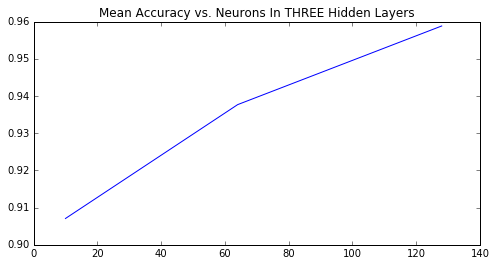

In [16]:
three_neurons = [ (10, 10, 10),
                (64, 64, 64),
                (128,128,128),
]
nn_three_accuracies = []

for n in three_neurons:
    nn_accuracies = neural_cross_validate(n)
    print(nn_accuracies)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In THREE Hidden Layers")

x = [i[0] for i in three_neurons]
plt.plot(x, nn_three_accuracies)

## Summary
With **three hidden layers**, average overall accuracy converges from 89% at 10 neuron each layer, to **96%** at 128 neuron each layer. The three layer model took half hour to run, whereas two layer was still close in accuracy and comparitively *better speed*.

It shows neural network have great potential in reaching very good accuracy levels in **image recognition**, provided computational power is deployed or plenty of time is at hand.